In [1]:
import cv2 
import sys
import matplotlib.pyplot as plt
%matplotlib inline


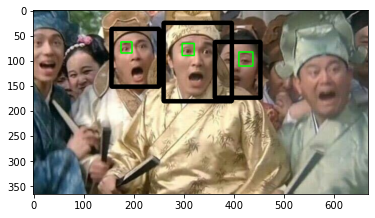

In [11]:


cascade_file = "C:/Python37/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml" # 정면 얼굴 인식
cascade_file2 = "C:/Python37/Lib/site-packages/cv2/data/haarcascade_lefteye_2splits.xml" #눈

image = cv2.imread('Image.jpg') #파일을 읽어온다
image

gray = cv2.cvtColor(image,6) # cv::COLOR_BGR2GRAY = 6,
gray

face_cascade = cv2.CascadeClassifier(cascade_file) # 정면얼굴 인식 분류기를 casecade에 담았다
eye_cascade = cv2.CascadeClassifier(cascade_file2) # 측면얼굴 인식 분류기를 casecade에 담았다

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# 얼굴이 검출되었다면 얼굴 위치에 대한 좌표 정보를 리턴 받는다.

for (x, y, w, h) in faces:
    # 원본 이미지에 얼굴의 위치를 표시한다. 
    cv2.rectangle(image,(x,y), (x+w, y+h+20), (0, 0, 0), thickness=8)

    # 눈 검출은 얼굴이 검출된 영역 내부에서만 진행하기 위해 ROI를 생성한다. 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    #눈 검출
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # 눈이 검출되었다면 눈 위치에 대한 좌표 정보를 리턴 
    for (ex,ey,ew,eh) in eyes:
        # 원본 이미지에 얼굴의 위치를 표시합니다. ROI에 표시하면 원본 이미지에도 표시된다. 
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        # cv2.imwrite('facedetect-output.png',image)


# 얼굴과 눈 검출 결과를 화면에 보여줍니다.
# cv2.imshow('image',image)
# cv2.waitKey(0)
